## Using features extracted from intensity profiles
## Multidimensional scaling applied to features

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import MDS

In [ ]:
import matplotlib.pylab as pylab
params = {
    'font.size': 12,
    'legend.fontsize':'large',
    'figure.titlesize':'large',
    'axes.grid':False,
    'axes.labelsize':'large',
    'axes.titlesize':'large',
    'xtick.labelsize':'large',
    'ytick.labelsize':'large',
    #'figure.figsize': (5, 6)
    }
pylab.rcParams.update(params)

In [ ]:
def plot_helper(scaled_data_transformed, data, x_dim=0, y_dim=1):
  fig, ax = plt.subplots(figsize=(6, 6))

  # Define color and marker mapping
  if data == 'experiment': # plaques 1-8
      color_map = {
          range(0, 20): ('*', 'black'),
          range(20, 34): ('o', 'blue'),
          range(34, 49): ('<', 'green'),
          range(49, 73): ('D', 'red'),
          range(73, 86): ('X', 'cyan'),
          range(86, 94): ('s', 'magenta'),
          range(94, 117): ('^', 'gray'),
          range(117, len(scaled_data_transformed)): ('p', 'purple')
      }
      round_one_cells = [0, 20, 34, 49, 73, 86, 94, 117]
  elif data == 'toy-similar': # similar toy data
      color_map = {
          range(0, 10): ('*', 'black'),
          range(10, 20): ('o', 'blue'),
          range(20, 30): ('<', 'green'),
          range(30, 40): ('D', 'red')
      }
      round_one_cells = [0, 10, 20, 30]
  elif data =='toy-dissimilar': # dissimilar toy data
      color_map = {
          range(0, 11): ('*', 'black'),
          range(11, 24): ('o', 'blue'),
          range(24, 31): ('<', 'green'),
          range(31, 37): ('D', 'red'),
          range(37, 47): ('X', 'cyan'),
          range(47, 56): ('s', 'magenta'),
      }
      round_one_cells = [0, 11, 24, 31, 37, 47]

  legend_scatter = []
  legend_labels = []

  # Scatter plot with markers and colors based on the marker map
  for i, (index_range, (marker, color)) in enumerate(color_map.items()):
      indices = index_range
      ax.scatter(scaled_data_transformed[indices, x_dim], scaled_data_transformed[indices, y_dim], marker=marker, c=color, s=50, alpha=0.75)
      legend_scatter.append(ax.scatter([], [], marker=marker, c=color, label=f'{i+1}'))
      legend_labels.append(f'{i+1}')

  for round_one_cell in round_one_cells:
      ax.scatter(scaled_data_transformed[round_one_cell, x_dim], scaled_data_transformed[round_one_cell, y_dim], s=100, facecolors='none', edgecolors='k')
      ax.annotate(f'P{round_one_cells.index(round_one_cell)+1}C1',
                  (scaled_data_transformed[round_one_cell, x_dim], scaled_data_transformed[round_one_cell, y_dim]),
                  ha='center', va='top', size='medium')

  #ax.legend(handles=legend_scatter, labels=legend_labels, bbox_to_anchor=(1.25, 0.75))
  ax.set_xlabel(f'Dimension {x_dim+1}')
  ax.set_ylabel(f'Dimension {y_dim+1}')
  plt.tight_layout()
  plt.legend()
  plt.show()

(153, 2)


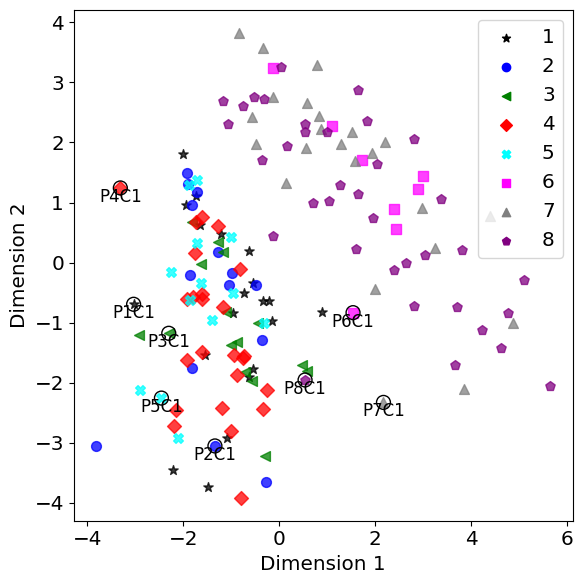

In [ ]:
file_name = 'experimental data - attributes.xlsx'
sheet_name = 'all plaques'
n_rows = 153
data = 'experiment'

# file_name = 'S1.xlsx'
# sheet_name = 'attributes'
# n_rows = 40
# data = 'toy-similar'

# file_name = 'S2.xlsx'
# sheet_name = 'attributes'
# n_rows = 40
# data = 'toy-similar'

# file_name = 'S3.xlsx'
# sheet_name = 'attributes'
# n_rows = 56
# data = 'toy-dissimilar'

attributes_df = pd.read_excel(file_name, sheet_name, nrows=n_rows)
attributes_df = attributes_df.drop(labels=['Unnamed: 0', 'Cell #', 'Plaque', 'Cell ID'], axis=1)
indices = ['GFP max', 'Infection time', 'Rise time', 'Lysis time', 'Infection duration', 'Rise rate', 'Area']
scaled_data = StandardScaler().fit_transform(attributes_df)
# pd.DataFrame(scaled_data, columns=attributes_df.columns)

embedding = MDS(n_components=2, metric=True, normalized_stress="auto", n_init=100, max_iter=2000, random_state=42)
scaled_data_transformed = embedding.fit_transform(scaled_data)
print(scaled_data_transformed.shape)
plot_helper(scaled_data_transformed, data=data, x_dim=0, y_dim=1)